In [1]:
import pandas as pd
from pandas.tseries.offsets import DateOffset 
import numpy as np 
from matplotlib import pyplot as plt
import yfinance as yf 
import streamlit as st 
import statsmodels.api as sm
import statsmodels.formula.api as smf

ModuleNotFoundError: No module named 'pandas'

In [ ]:
#Creating Functions to make my life easier
def cumreturns(df):
    r = df.pct_change()
    c = (r+1).cumprod()-1 
    c = c.fillna(0)
    return c

def plotprice(ticker):
    str(ticker)
    placeholder= yf.download(ticker)['Adj Close']
    return placeholder.plot(figsize = (16,9))

Everything Before this was set up

In [ ]:
#Define some important variables
complist = ['SNY','PFE','AZN','VRTX','REGN','^DRG','ROG.SW','NVS','GSK','BAYRY','NVO','JNJ','ABT','ABBV','MRK','LLY','BMY']
Metrics  = ['sector','country','website','industry','grossMargins','ebitdaMargins','operatingMargins','ebitda','totalDebt','debtToEquity','beta','marketCap','payoutRatio','dividendYield','fiveYearAvgDividendYield','lastDividendValue','lastDividendDate','revenuePerShare','returnOnAssets','returnOnEquity','revenueGrowth','bookValue','priceToBook',]
start = st.date_input('Start', value = pd.to_datetime('2014-01-01'))
end = st.date_input('End', value = pd.to_datetime('today'))

In [ ]:
#Setting up Data Table     
HH = pd.DataFrame()

for ticker in complist:
   HH[str(ticker)] = yf.Ticker(str(ticker)).info

HH = HH[HH.index.isin(Metrics)]
HH
    

This next Cell is not necessary for Dashboard too Run

[*********************100%%**********************]  17 of 17 completed


,ABBV,ABT,AZN,BAYRY,BMY,GSK,JNJ,LLY,MRK,NVO,NVS,PFE,REGN,ROG.SW,SNY,VRTX,^DRG
Date,,,,,,,,,,,,,,,,,
2014-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-01-03,0.006156,0.010725,0.004951,0.003075,0.011096,0.000189,0.009008,0.007294,0.004850,0.013398,0.004954,0.001970,-0.010343,0.000000,0.005604,-0.005147,0.005428
2014-01-06,-0.030589,0.024065,0.005464,0.004466,0.007079,0.003978,0.014281,0.015770,0.005052,0.010566,0.005970,0.002955,-0.020868,0.001191,0.004638,0.022620,0.004195
2014-01-07,-0.028665,0.016217,-0.001024,0.008713,0.005548,0.005304,0.035812,0.009067,0.012528,0.024291,0.009527,0.009192,-0.001894,0.008337,0.003092,0.008939,0.012953
2014-01-08,-0.031166,0.025372,-0.000854,-0.004979,0.022001,-0.001137,0.034384,0.007491,0.006062,0.031262,0.012576,0.016087,-0.003970,0.015482,-0.012947,0.018963,0.017212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-05,4.010285,2.559208,2.148475,-0.687167,0.232609,0.323625,1.246925,16.287627,2.636192,8.516852,1.105398,0.350326,2.409920,0.256604,0.328313,4.809156,1.115188
2024-02-06,4.069673,2.634122,2.240310,-0.677811,0.265492,0.329357,1.279518,16.258986,2.656365,8.464544,1.110892,0.397590,2.415310,0.256876,0.331426,4.636327,1.133655
2024-02-07,4.119992,2.612126,2.216626,-0.683506,0.249564,0.337954,1.278365,16.757150,2.673367,8.549042,1.105195,0.400639,2.417787,0.244065,0.327465,4.676283,1.149159


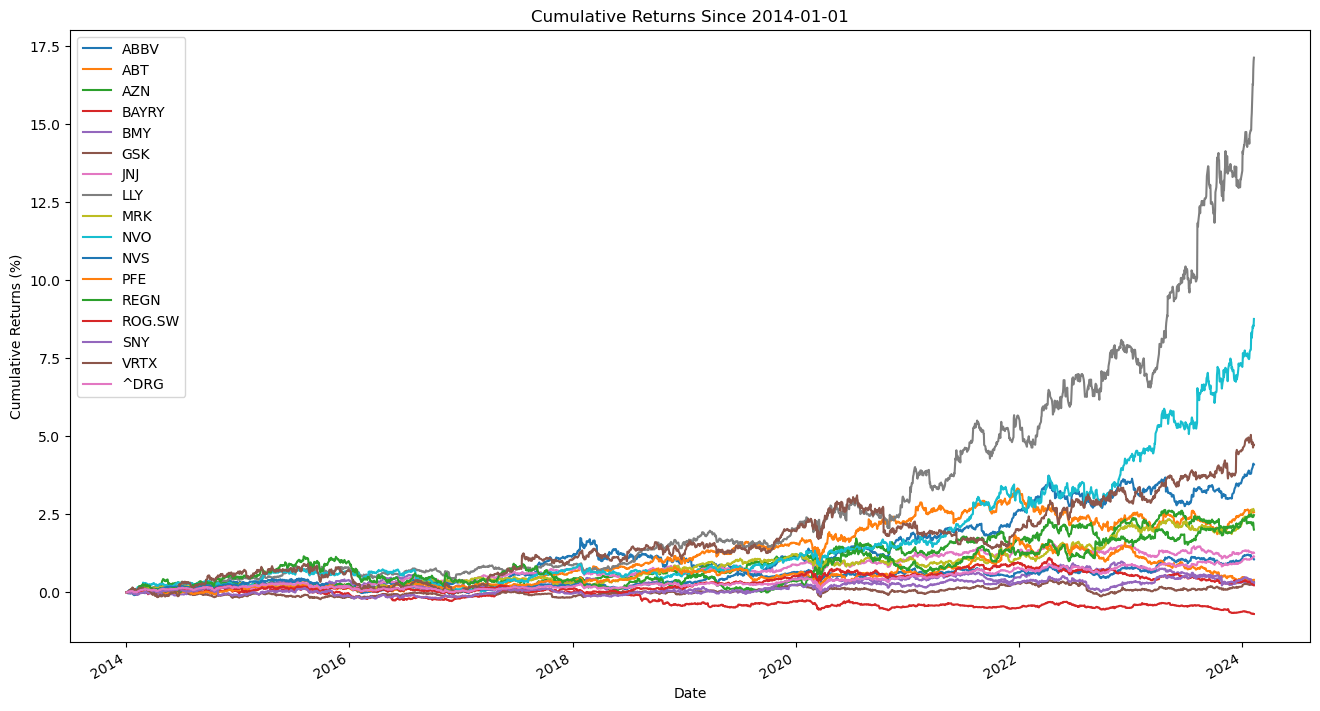

In [ ]:
#Just testing if it works. Not necessary to run dashboard

pricedf = yf.download(complist,start= start)['Adj Close']
comprets = cumreturns(pricedf)
title = 'Cumulative Returns Since {}'.format(start)
comprets.plot(title = title, figsize = (16,9))
plt.ylabel('Cumulative Returns (%)')

comprets

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

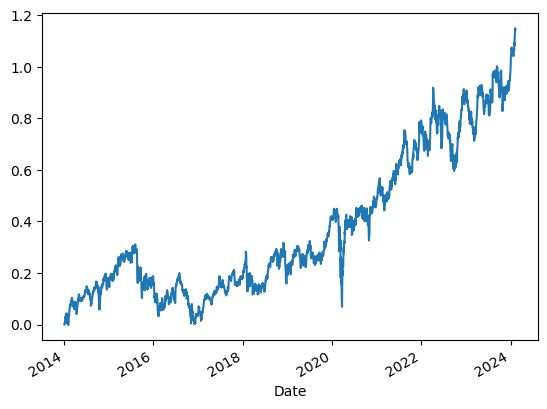

In [ ]:
benchmark =cumreturns(yf.download('^DRG',start = start)['Adj Close']) 
benchmark.plot()

'Cumulative Returns Since {}'

Streamlit Main Streamlit section ()

In [ ]:
st.title('ABC Companion Dashboard')

#Define some key variables first
complist = ['SNY','PFE','AZN','VRTX','REGN','^DRG','ROG.SW','NVS','GSK','BAYRY','NVO','JNJ','ABT','ABBV','MRK','LLY','BMY']
Metrics  = ['sector','country','website','industry','grossMargins','ebitdaMargins','operatingMargins','ebitda','totalDebt','debtToEquity','beta','marketCap','payoutRatio','dividendYield','fiveYearAvgDividendYield','lastDividendValue','lastDividendDate','revenuePerShare','returnOnAssets','returnOnEquity','revenueGrowth','bookValue','priceToBook',]

#Data Table
HH = pd.DataFrame()

for ticker in complist:
   HH[str(ticker)] = yf.Ticker(str(ticker)).info

HH = HH[HH.index.isin(Metrics)]
################################################################################

start = st.date_input('Start', value = pd.to_datetime('2014-01-01'))
end = st.date_input('End', value = pd.to_datetime('today'))
dropdown = st.multiselect('Select Assets',complist)

#Data Table
HH = pd.DataFrame()

for ticker in dropdown:
   HH[str(ticker)] = yf.Ticker(str(ticker)).info

HH = HH[HH.index.isin(Metrics)]
st.table(HH)

#Log Price Line Chart
if len(dropdown)>0:
    pricedf = np.log10(yf.download(dropdown,start= start, end= end)['Adj Close'])
    st.header('Log Prices: {}'.format(dropdown))
    st.line_chart(pricedf)

#Flat Price Line Chart
if len(dropdown)>0:
    pricedf = yf.download(dropdown,start= start, end= end)['Adj Close']
    st.header('Flat Prices: {}'.format(dropdown))
    st.line_chart(pricedf)

#Period Volatility 
if len(dropdown) > 0:
    st.subheader('Period Volatility (normalised around 0):')
    st.write((np.std(pricedf))/np.std(yf.download('^DRG',start= start, end= end)['Adj Close']))
    

#Benchmark Volatility 
if len(dropdown) > 0:
    st.subheader('Benchmark Volatility:')
    st.writte(np.std(yf.download('^DRG',start= start, end= end)['Adj Close'])/np.mean(yf.download('^DRG',start= start, end= end)['Adj Close']))


In [ ]:
regression = pd.DataFrame()

regression['y'] = yf.download('SNY')['Adj Close'].pct_change().fillna(0)
regression['x'] = yf.download('^GSPC')['Adj Close'].pct_change().fillna(0)
regression['z']= yf.download('^DRG')['Adj Close'].pct_change().fillna(0)

model = sm.OLS(regression['y'],regression['z']).fit()
model.summary()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.448
Model:                            OLS   Adj. R-squared (uncentered):              0.447
Method:                 Least Squares   F-statistic:                              4407.
Date:                Sun, 11 Feb 2024   Prob (F-statistic):                        0.00
Time:                        17:02:57   Log-Likelihood:                          16093.
No. Observations:                5441   AIC:                                 -3.218e+04
Df Residuals:                    5440   BIC:                                 -3.218e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
z              1.0637      0.016     66.382      0.000       1.032       1.095
==============================================================================
Omnibus:                     1057.933   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24791.108
Skew:                          -0.300   Prob(JB):                         0.00
Kurtosis:                      13.440   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='Date'>

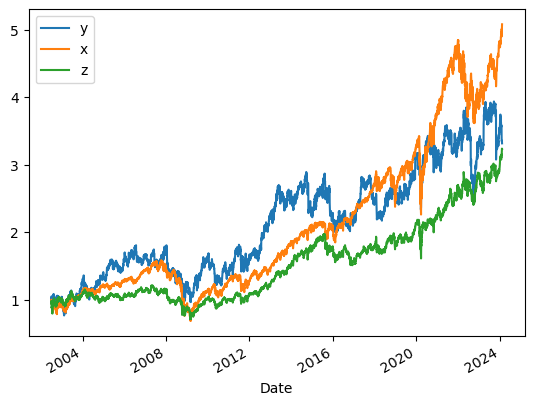

In [ ]:
((regression+1).cumprod()).plot()

In [ ]:
list(yf.Ticker('SNY').info.keys())